# 1) Install and import all the libraries

In [1]:
#basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluvation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# 2) Load the datas-Mnist

In [2]:
#Digit Mnist dataset
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [3]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 3) Datas Visuvalization as images

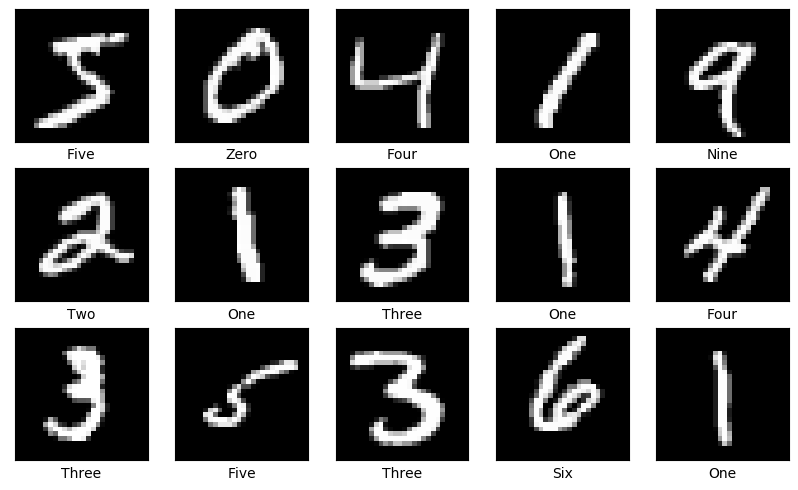

In [5]:
#names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visuvalizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])

In [6]:
#Input having 3D form we have to convert as 2D
X_train_digit.shape

(60000, 28, 28)

#In this we are having 3 dimensions , in ANN 2 dimensions should be there.
#so we have to pre-process 3D to 2D by re-shapping

In [7]:
#preprocess-convert 3D to 2D
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [8]:
X_train_digit.shape

(60000, 784)

#After conversion of input ,output to be preprocess in readable way.

In [9]:
#Output having numerical it is not able to readble
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
y_test_digit.shape

(10000,)

#array([7, 2, 1, ..., 4, 5, 6] = output should be pre-proces through encoding categorical method to get output as readable

In [11]:
#Preprocess output 7,2,1 as 0000001000,0100000000,1000000000(Encoding digit mnist label)
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [12]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 4) Brain Creation

In [14]:
#layers.Dropout(0.3),
#layers.BatchNormalization(),after execution of fit method we got 96% ,if we need more accuracy both two lines 
#used for gaining more accuracy.(we can run without hashtag)

#Creating base neural network
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Model Summary explaination
#Formula:
   #Parameter num = output channel number * (input channel num + 1)substitue the output shape & input in this we will get answer
   #1) dense (Dense)               (None, 256)               200960  
              #o/p(256)*(i/p(784)+1) = 256*785 =200960
   #2) dense_1 (Dense)             (None, 64)                16448 
              #o/p(64)*(i/p(256)+1) = 64*257 =16448
   #3) dense_2 (Dense)             (None, 64)                4160 
              #o/p(64)*(i/p(64)+1) = 64*65 =4160
   #4) dense_3 (Dense)             (None, 10)                650 
              #o/p(10)*(i/p(64)+1) = 10*65 =650

In [17]:
#compiling the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [18]:
#Model creation or fitting the model
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 1.2827 - accuracy: 0.8349 - val_loss: 0.3480 - val_accuracy: 0.9137
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2738 - accuracy: 0.9284 - val_loss: 0.2553 - val_accuracy: 0.9354
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1976 - accuracy: 0.9472 - val_loss: 0.2025 - val_accuracy: 0.9479
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1611 - accuracy: 0.9566 - val_loss: 0.2160 - val_accuracy: 0.9507
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1412 - accuracy: 0.9617 - val_loss: 0.2100 - val_accuracy: 0.9510
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1257 - accuracy: 0.9653 - val_loss: 0.1665 - val_accuracy: 0.9607
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1104 - accuracy: 0.9705 - val_loss: 0.1817 - val_accuracy: 0.9592
Epoch 

In [19]:
#Predicting the labels-digit
y_predict=model.predict(X_test_digit)

313/313 [==============================] - 1s 1ms/step


In [20]:
y_predict[0]

array([0.9898195 , 0.9998036 , 0.99986184, 0.9987512 , 0.8416485 ,
       0.31405798, 0.08985967, 1.        , 0.36750674, 0.9999853 ],
      dtype=float32)

In [21]:
#y_predict should be readable
#array([0.01575289, 0.9999997 , 0.9999999 , 1.        , 0.64132446,
       #0.9584879 , 0.00108279, 1.        , 0.9999878 , 0.99999917],
    #so convert the vector through encoder

In [22]:
y_predicts=np.argmax(y_predict,axis=1)#Here we get the index of maximum value in the encoded vector

In [23]:
y_predicts

array([7, 2, 1, ..., 4, 2, 0], dtype=int64)

In [24]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [25]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Visualization through graph 

Text(0.5, 1, 'True or False predicted digit MNIST/n')

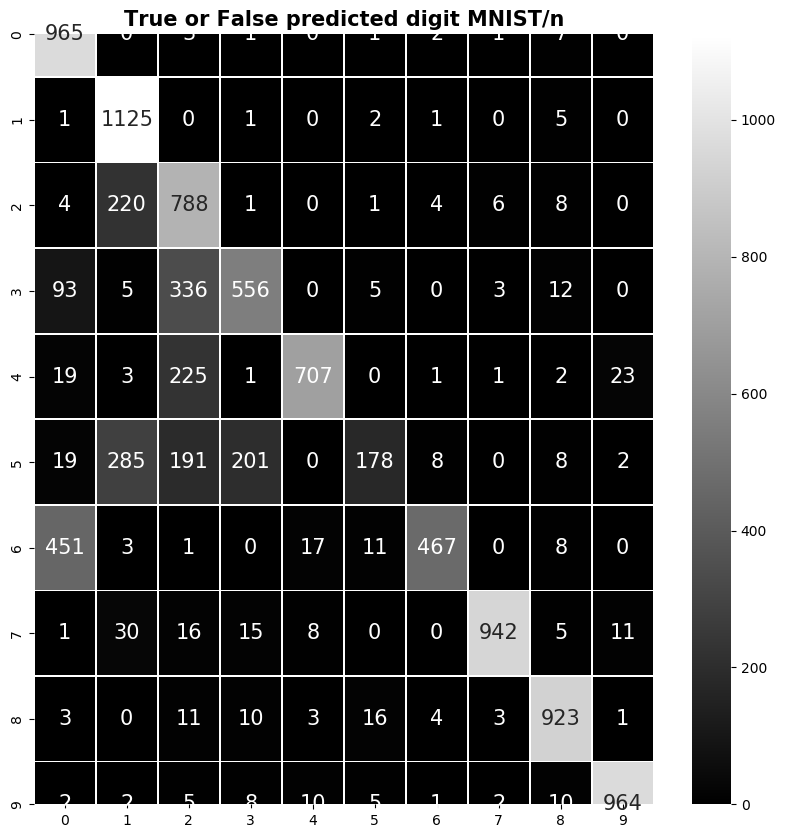

In [26]:
#Confusion matrix for digit Mnist
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap='gray')
plt.title('True or False predicted digit MNIST/n',fontweight='bold',fontsize=15)

In [27]:
#In this gragh diagonal dimension is wanted(True) and others from diagonal is unwanted(False)(ex:diagonals(1,1),(2,2),(3,3))

In [28]:
#We need accuracy reports through the classification report(precision,recall,f1-score)
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       980
           1       0.67      0.99      0.80      1135
           2       0.50      0.76      0.60      1032
           3       0.70      0.55      0.62      1010
           4       0.95      0.72      0.82       982
           5       0.81      0.20      0.32       892
           6       0.96      0.49      0.65       958
           7       0.98      0.92      0.95      1028
           8       0.93      0.95      0.94       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.76     10000
   macro avg       0.81      0.75      0.74     10000
weighted avg       0.81      0.76      0.75     10000



In [29]:
#The overall and average of accuracy is : 76 %

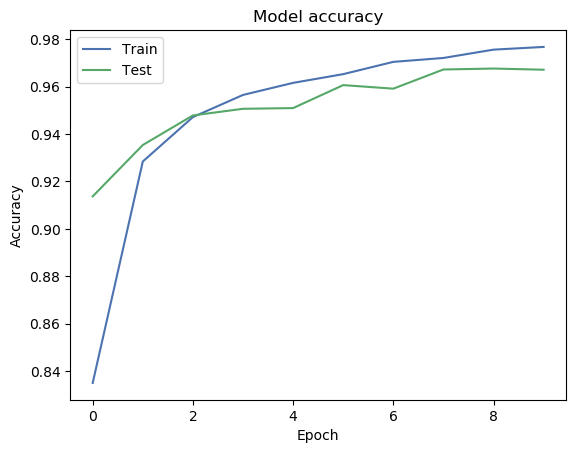

In [30]:
#summarize history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [31]:
#In this accuracy always decrease to increase while train and test result(Accuracy should increasing path)

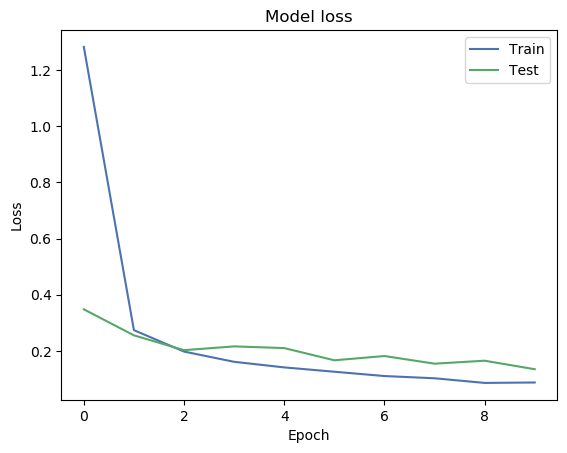

In [32]:
#summarize history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [33]:
#In this loss always increase to decrease while train and test result(error should be in decreasing path)

In [34]:
#Validate the model process through encoder need as image in single output (Crosscheck)
#tf.expand_dims(X_test_digit[0])
y_predict_single=model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)#Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

1/1 [==============================] - 0s 19ms/step


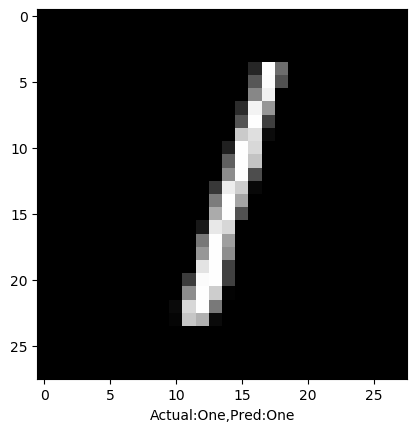

In [35]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visuvalizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [36]:
#Predicted and actual output is correct